In [1]:
import pandas as pd
import numpy as np
import gensim
import utils
import warnings
%matplotlib inline
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
import seaborn as sns
import xgboost as xgb
import multiprocessing
from sklearn import preprocessing
from gensim.models import Doc2Vec
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from collections import defaultdict  # For word frequency
from sklearn.model_selection import train_test_split
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
path='C:\\Users\\jyoti\\Desktop\\NLP\\NLP_project\\NLP-project-\\'
df=pd.read_csv(path + 'Dataset\\3.csv')

## Doc2vec

In [3]:
tokenized_caption = df['caption'].apply(lambda x: str(x).split()) # tokenizing 

sentences = [TaggedDocument(token, 'tag') for token in tokenized_caption]

d2v_model_caption = Doc2Vec(min_count=20,
                     window=2,
                     vector_size=250,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007,
                     negative=20,
                     workers=cores-1)

d2v_model_caption.build_vocab(sentences)
d2v_model_caption.train(sentences, total_examples= len(df['caption']), epochs=20)
d2v_model_caption.save(path + "Save Models\\200_Doc2vec_Caption.model")

In [4]:
def word_vector(tokens, size,model):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [5]:
doc2vec_Arrays = np.zeros((len(tokenized_caption), 250)) 
for i in range(len(tokenized_caption)):
    doc2vec_Arrays[i,:] = word_vector(tokenized_caption[i], 250,d2v_model_caption)
d2v_df_cap = pd.DataFrame(doc2vec_Arrays)
d2v_df_cap.shape

(26800, 250)

## hashtags

In [6]:
tokenized_hash = df['hashtags'].apply(lambda x: str(x).split()) # tokenizing 

sentences = [TaggedDocument(token, 'tag') for token in tokenized_hash]

d2v_model_hastag = Doc2Vec(min_count=20,
                     window=2,
                     size=250,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

d2v_model_hastag.build_vocab(sentences)
d2v_model_hastag.train(sentences, total_examples= len(df['hashtags']), epochs=20)
d2v_model_hastag.save(path + "Save Models\\200_Doc2vec_Hashtag.model")

C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\gensim\models\doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [7]:
doc2vec_Arrays = np.zeros((len(tokenized_hash), 250)) 
for i in range(len(tokenized_hash)):
    doc2vec_Arrays[i,:] = word_vector(tokenized_hash[i], 250,d2v_model_hastag)
d2v_df_hash = pd.DataFrame(doc2vec_Arrays)
d2v_df_hash.shape

(26800, 250)

## mentions

In [8]:
tokenized_ment = df['mentions'].apply(lambda x: str(x).split()) # tokenizing 

sentences = [TaggedDocument(token, 'tag') for token in tokenized_ment]

d2v_model_mentions = Doc2Vec(min_count=20,
                     window=2,
                     size=250,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

d2v_model_mentions.build_vocab(sentences)
d2v_model_mentions.train(sentences, total_examples= len(df['mentions']), epochs=20)
d2v_model_mentions.save(path + "Save Models\\200_Doc2vec_Mentions.model")

In [9]:
doc2vec_Arrays = np.zeros((len(tokenized_ment), 250)) 
for i in range(len(tokenized_ment)):
    doc2vec_Arrays[i,:] = word_vector(tokenized_ment[i], 250,d2v_model_mentions)
d2v_df_ment = pd.DataFrame(doc2vec_Arrays)
d2v_df_ment.shape

(26800, 250)

In [10]:
d2v_Df = pd.DataFrame(np.hstack((d2v_df_cap,d2v_df_hash,d2v_df_ment, df)))

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [12]:
d2v_Df

,0,1,2,3,4,5,6,7,8,9,...,763,764,765,766,767,768,769,770,771,772
0,0.626251,-0.101575,0.0218077,-0.17139,-0.0443329,0.244269,-0.0597332,-0.195029,0.408327,-0.80725,...,0,0,0,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,NaN,0,[],NaN,0
1,0.865401,-0.201751,-0.0754015,-0.402513,-0.265622,0.312446,-0.0442709,-0.113408,0.270366,-0.59894,...,0,0.333333,0.25,"'#michelin', '#michelinstar', '#michelinuk', '...",28,NaN,0,[],NaN,0
2,-0.202357,0.0557625,0.0320535,0.197715,0.232563,0.0742584,0.175164,-0.142539,0.0332943,-0.0827715,...,0,0.333333,0.166667,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],NaN,0
3,0.154698,-0.0261295,-0.165877,-0.173313,0.0819704,0.127033,-0.0909139,-0.0612225,0.218149,-0.278824,...,0,0,0,"'#michelin', '#michelinstar', '#michelinuk', '...",30,NaN,0,[],NaN,0
4,0.237244,-0.236506,-0.204595,-0.356259,-0.15259,-0.264758,-0.135914,0.17666,0.0600903,-0.137654,...,0,0.791667,-0.0416667,NaN,0,"'@_mark_donald', '@theglenturretlalique', '@ca...",11,[],NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,0.327331,-0.220796,-0.14743,-0.373683,-0.296406,-0.15858,-0.137986,0.113527,0.0862302,-0.333733,...,0,0.506629,0.42803,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],NaN,0
26796,0.164412,-0.211948,-0.156641,-0.480675,-0.272134,-0.0252885,-0.156091,0.0428271,0.08341,-0.231816,...,0,0.416667,0.491667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,['🍾'],'bottle with popping cork',1
26797,0.282258,-0.26403,-0.149711,-0.53399,-0.380405,-0.0569242,-0.150952,0.0701792,0.0657054,-0.292492,...,0,0.510417,0.260417,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],NaN,0
26798,0.140867,-0.178478,-0.0491558,-0.301355,-0.220298,-0.0841583,-0.0781223,0.0605942,0.0501115,-0.183887,...,0,0.708333,0.445833,"'#lookingforward', '#travelinspo', '#datenight...",7,NaN,0,[],NaN,0


In [13]:
dropped = [751,766,768,770,771]
d2v_df = d2v_Df.drop(dropped,axis=1)
d2v_df

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,767,769,772
0,0.626251,-0.101575,0.0218077,-0.17139,-0.0443329,0.244269,-0.0597332,-0.195029,0.408327,-0.80725,...,0,0,0,1,0,0,0,25,0,0
1,0.865401,-0.201751,-0.0754015,-0.402513,-0.265622,0.312446,-0.0442709,-0.113408,0.270366,-0.59894,...,0,0,0,0,0,0.333333,0.25,28,0,0
2,-0.202357,0.0557625,0.0320535,0.197715,0.232563,0.0742584,0.175164,-0.142539,0.0332943,-0.0827715,...,1,0,0,0,0,0.333333,0.166667,28,2,0
3,0.154698,-0.0261295,-0.165877,-0.173313,0.0819704,0.127033,-0.0909139,-0.0612225,0.218149,-0.278824,...,0,0,0,0,0,0,0,30,0,0
4,0.237244,-0.236506,-0.204595,-0.356259,-0.15259,-0.264758,-0.135914,0.17666,0.0600903,-0.137654,...,0,0,1,0,0,0.791667,-0.0416667,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,0.327331,-0.220796,-0.14743,-0.373683,-0.296406,-0.15858,-0.137986,0.113527,0.0862302,-0.333733,...,0,0,1,0,0,0.506629,0.42803,6,4,0
26796,0.164412,-0.211948,-0.156641,-0.480675,-0.272134,-0.0252885,-0.156091,0.0428271,0.08341,-0.231816,...,1,0,0,0,0,0.416667,0.491667,7,1,1
26797,0.282258,-0.26403,-0.149711,-0.53399,-0.380405,-0.0569242,-0.150952,0.0701792,0.0657054,-0.292492,...,0,0,0,0,0,0.510417,0.260417,8,1,0
26798,0.140867,-0.178478,-0.0491558,-0.301355,-0.220298,-0.0841583,-0.0781223,0.0605942,0.0501115,-0.183887,...,1,0,0,0,0,0.708333,0.445833,7,0,0


In [14]:
d2v_df = pd.DataFrame(d2v_df)
data=d2v_df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
d2v_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

In [15]:
y=d2v_df.iloc[ :, -1:]  #Target Variable          
X=d2v_df.iloc[: , :-1]  #Feature Matrix

X=pd.DataFrame(X)
y=pd.DataFrame(y)

for i in X.columns:
  X[i]=pd.to_numeric(X[i])
for i in y.columns:
  y[i]=pd.to_numeric(y[i])


x_train_doc2vec, x_test_doc2vec, y_train_doc2vec, y_test_doc2vec = train_test_split(X, y, test_size=0.2,random_state=2022)

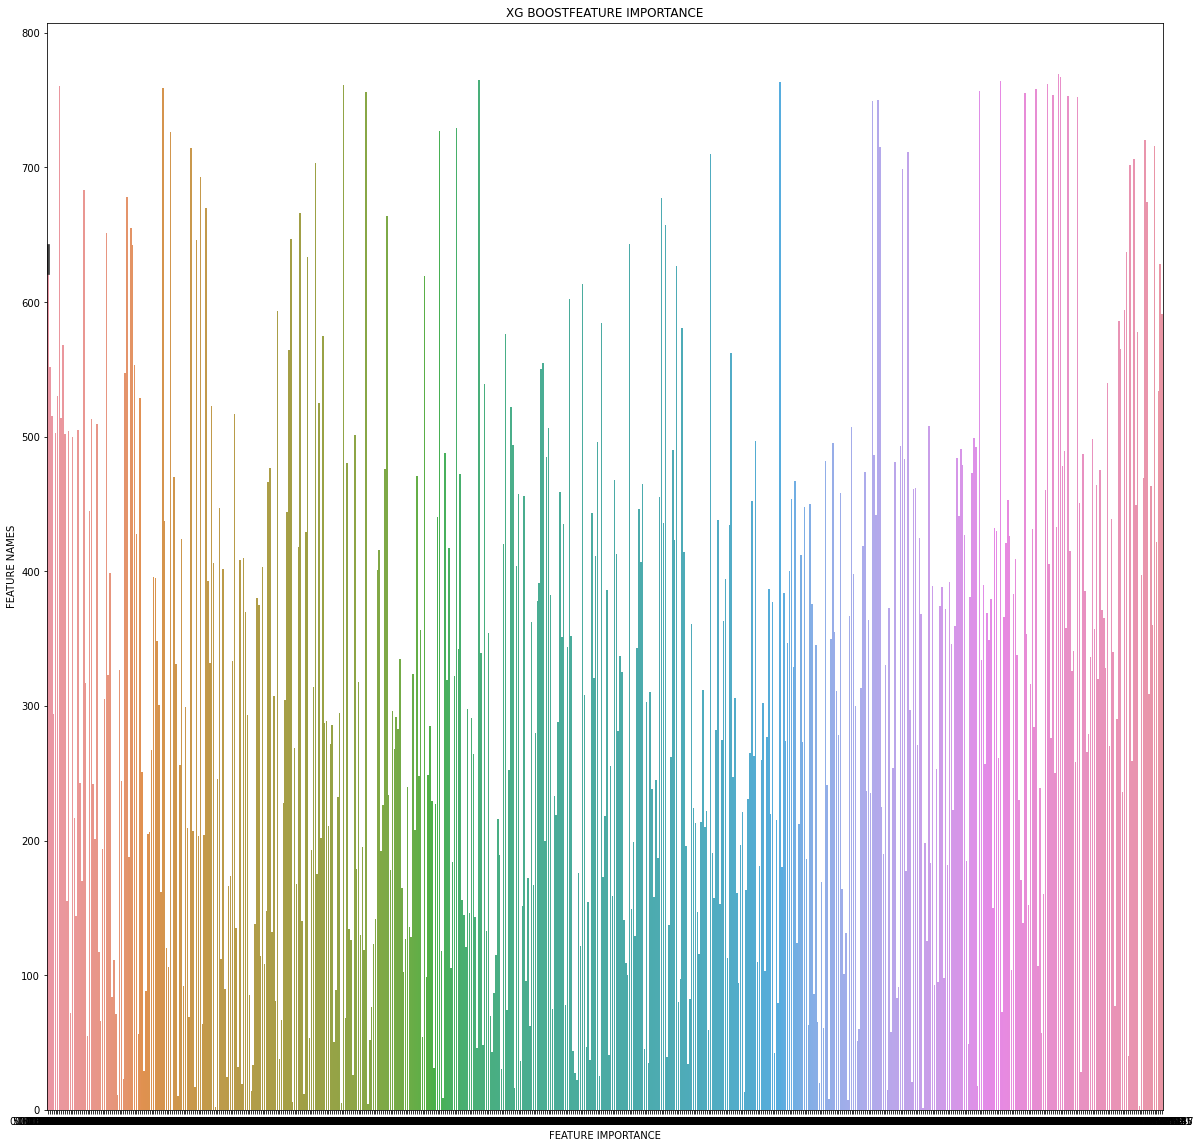

In [16]:
# utils.hyperparameterTuning_XGBoost(x_train_doc2vec,y_train_doc2vec)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7)
xg_reg.fit(x_train_doc2vec, y_train_doc2vec)
y_pred = xg_reg.predict(x_test_doc2vec)
utils.plot_feature_importance(xg_reg.feature_importances_,x_train_doc2vec.columns,'XG BOOST')

C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RMSE: 0.048032

R2 Score: 0.156554

MAE : 0.030239

MSE : 0.002307

RMSLE : -3.035886

max_error : 0.829942



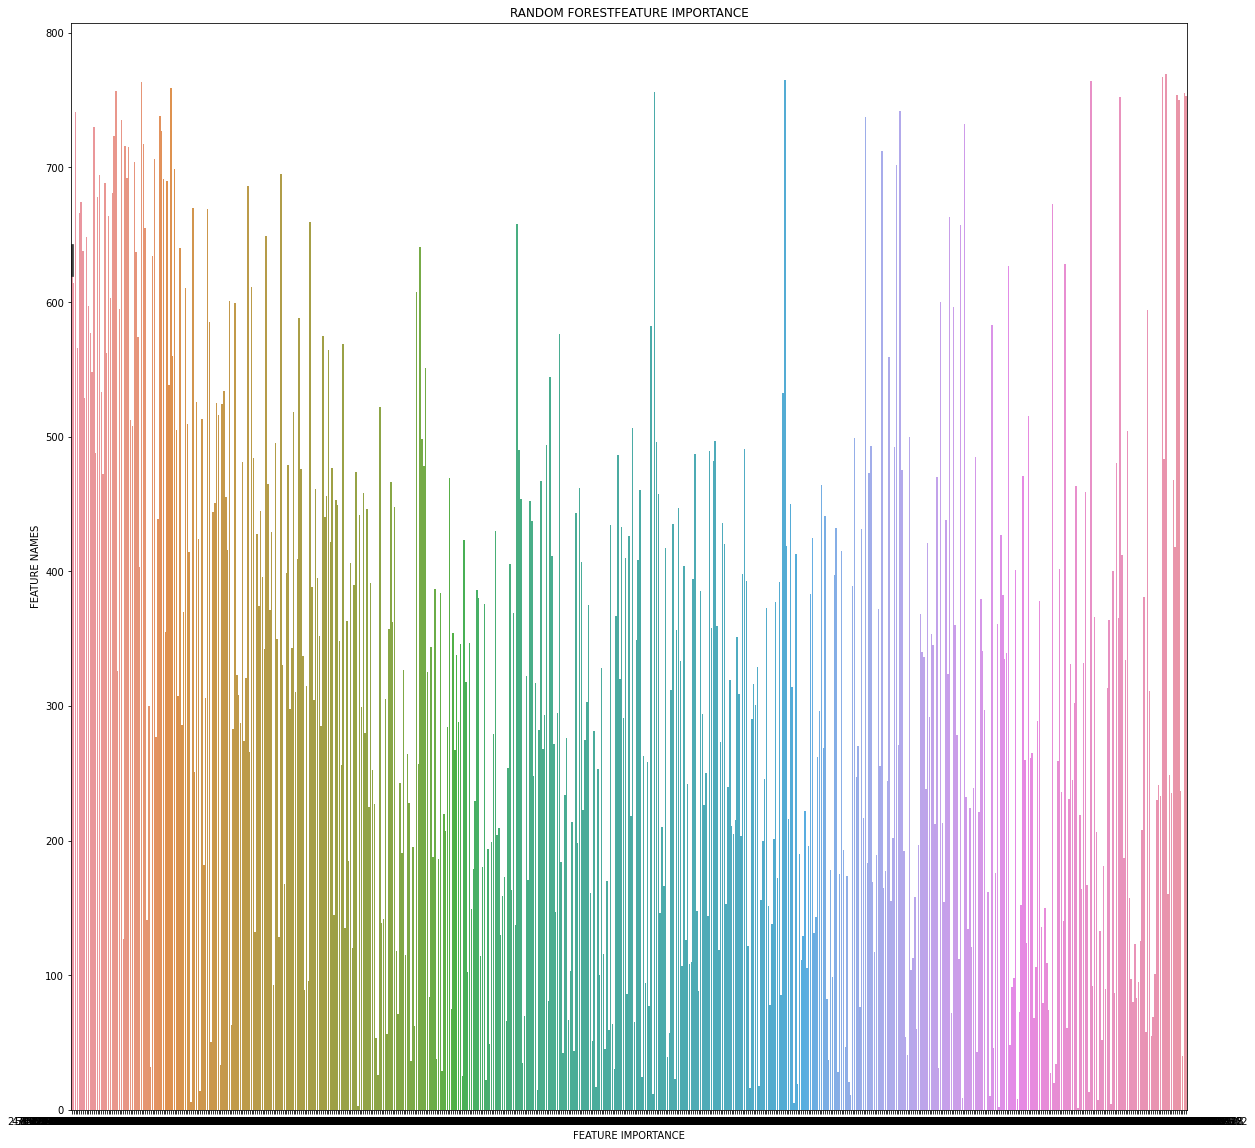

In [17]:
# utils.hyperparameterTuning_RandomForest(x_train_doc2vec,y_train_doc2vec)
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_doc2vec, y_train_doc2vec)
y_pred_w2v_df = rnd_clf.predict(x_test_doc2vec)
utils.metrics(y_test_doc2vec,y_pred_w2v_df)
utils.plot_feature_importance(rnd_clf.feature_importances_,x_train_doc2vec.columns,'RANDOM FOREST')